# Milestone 1
Izzan Dienurrahman HCK-003

## Background
I'm a data analyst at an e-commerce company that responsible for maximizing company's revenue. In order to do so, I have to evaluate and analyze historical data to gain insights and plan strategic measures for the next quarter.

## Objective
Increasing sales for the next quarter

## Problem Statement
- Sales over time
- Most profitable product
- Top sales occurence
- Customers location
- Number of customers over time
- Number of transactions


## Data Loading
sumber: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

In [500]:
import pandas as pd # import library needed
import missingno as msno # missing data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [501]:
pd.options.display.float_format = '{:,.2f}'.format #add thousand separator for display

In [502]:
# add custom missing values
missing_values = ["n/a", "na", "--"]

In [503]:
df = pd.read_csv("Amazon Sale Report.csv",na_values=missing_values)

/var/folders/lv/63lr74g926b4flfb_7npy3m40000gn/T/ipykernel_26167/2447737156.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv",na_values=missing_values)


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [505]:
df.set_index('index', inplace = True) # set kolom index menjadi index

In [506]:
df.head() # menampilkan data 5 teratas

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,"400,081.00",IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,"560,085.00",IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,"410,210.00",IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,"605,008.00",IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,"600,073.00",IN,NaN,False,NaN,NaN


## Data Cleaning
cleaning reference: https://www.kaggle.com/code/jasonkryske/e-commerce-sales-data-cleaning-in-python

<AxesSubplot:>

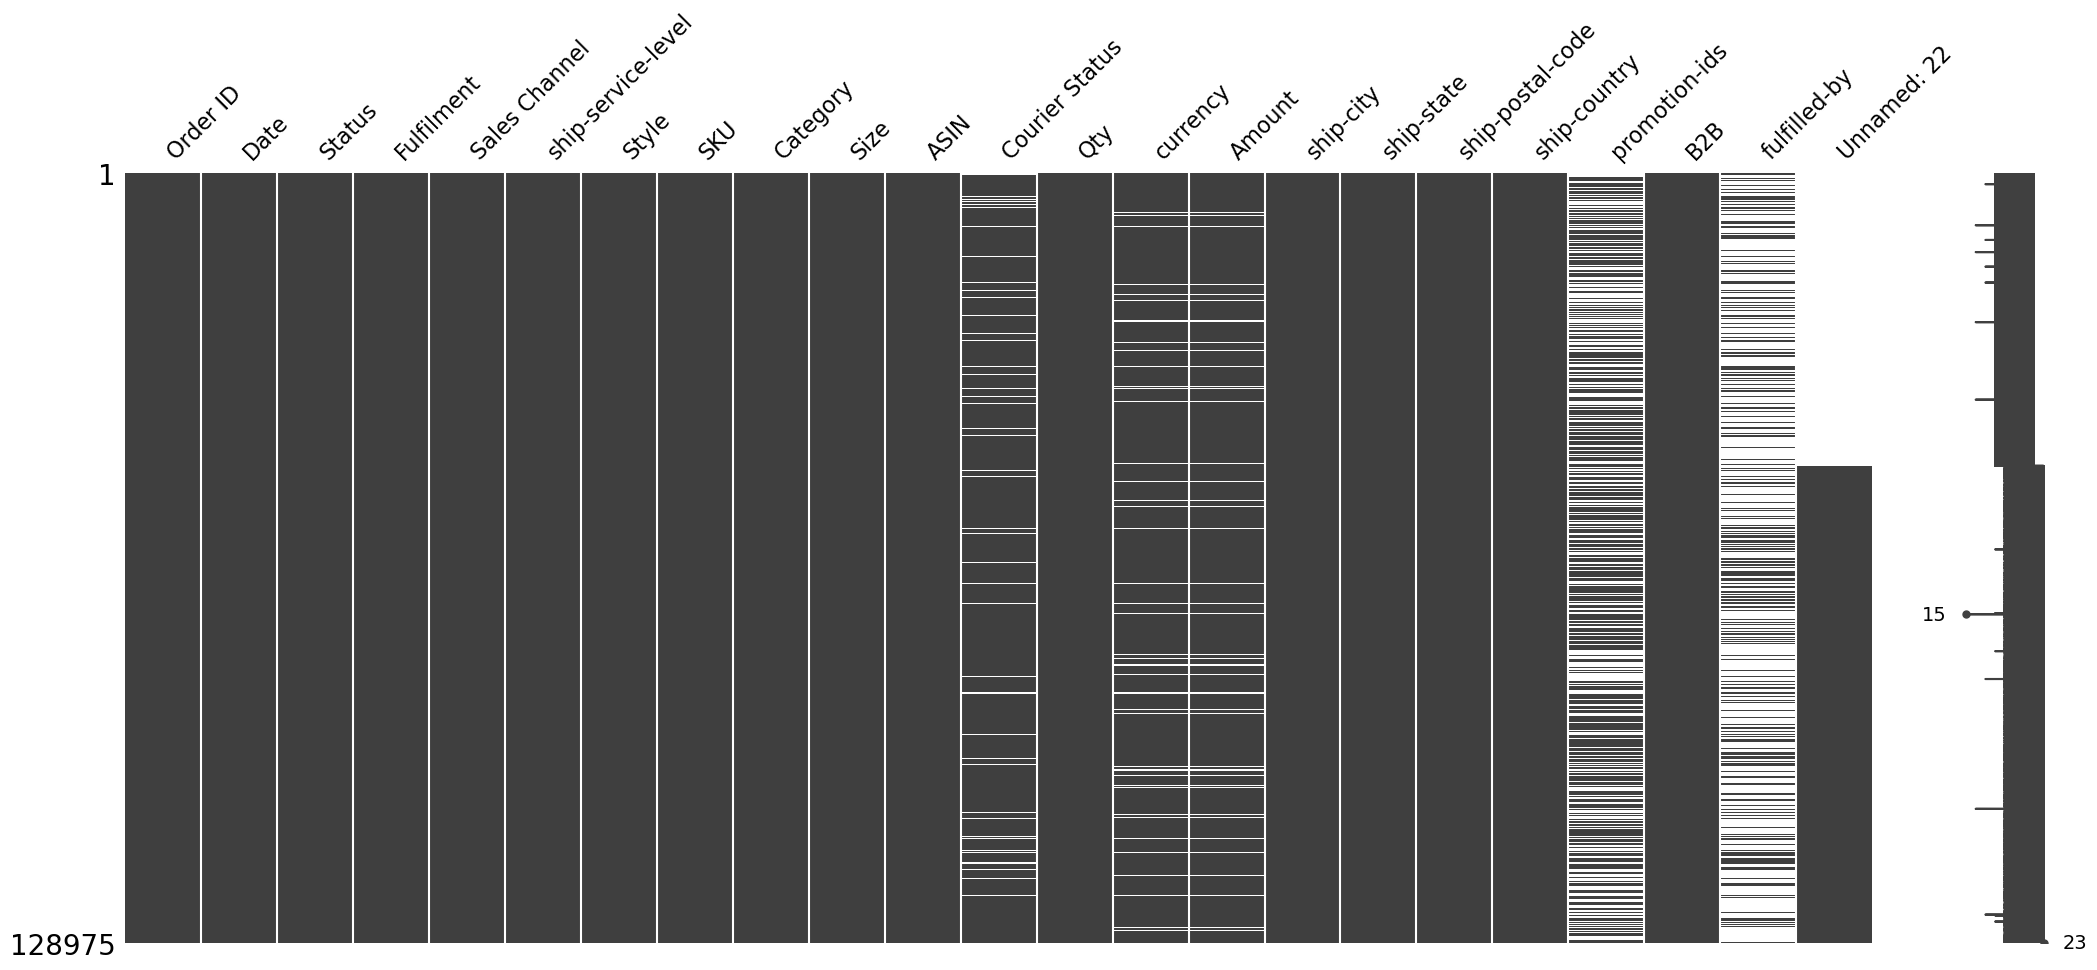

In [507]:
msno.matrix(df) # visualisasi missing data

<AxesSubplot:>

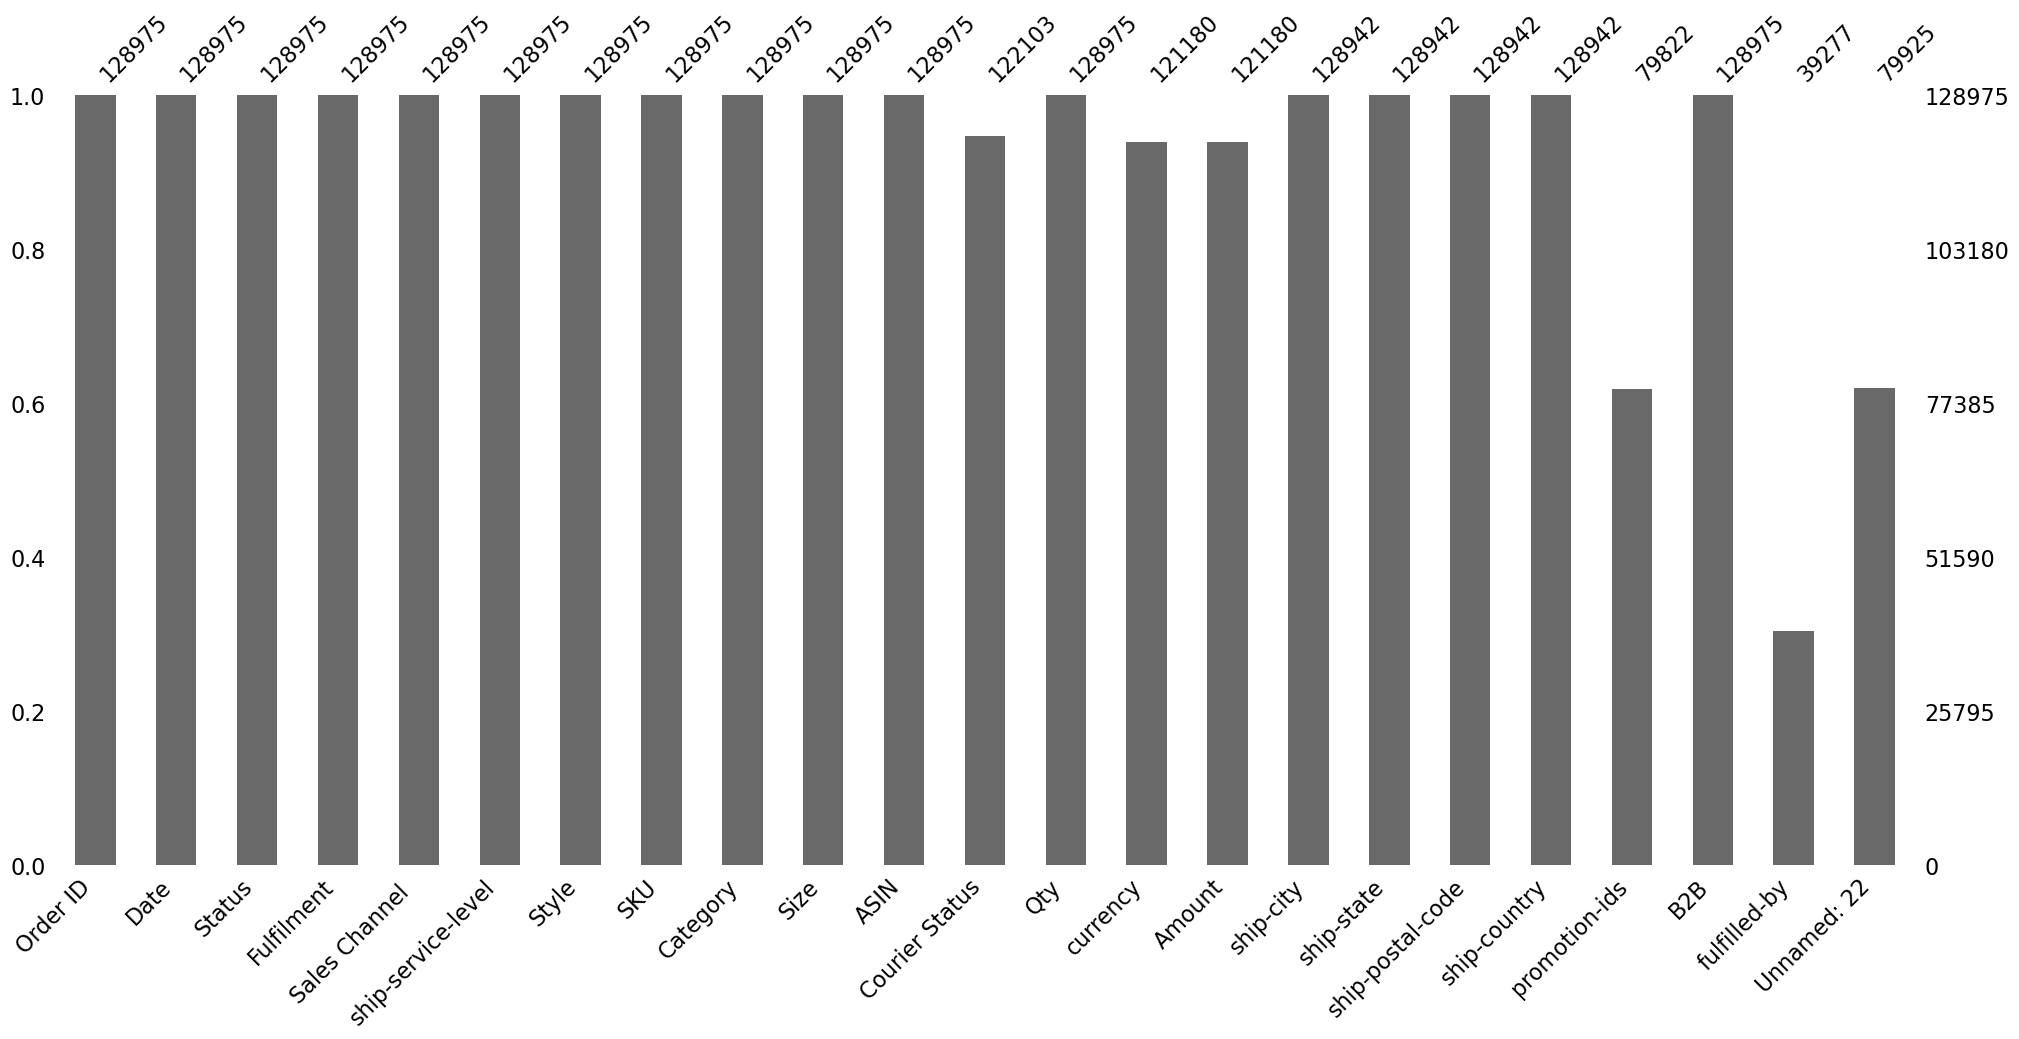

In [508]:
msno.bar(df)

In [509]:
df.nunique() # cek jumlah unique value tiap kolom

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [510]:
df.apply(pd.unique) # menampilkan unique values tiap kolom

Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]
currency                                                     [IN

In [511]:
# drop beberapa kolom yang tidak dibutuhkan
df.drop(columns = ['Unnamed: 22','fulfilled-by','ship-country', 'currency','Sales Channel '], inplace = True) 

In [512]:
before_remove_duplicates = len(df)

In [513]:
df.drop_duplicates(inplace = True) # drop data duplikat

In [514]:
after_remove_duplicates = len(df)
duplicate_rows_removed = before_remove_duplicates - after_remove_duplicates
print(f'{duplicate_rows_removed} duplicate rows have been removed! \nThe Dataset now has {after_remove_duplicates} rows.')

6 duplicate rows have been removed! 
The Dataset now has 128969 rows.


In [515]:
df[df.isnull().any(axis = 1)] # cek semua null value jika ada minimal 1 pada tiap kolom di dataframe

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,"400,081.00",NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,"605,008.00",NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,"600,073.00",NaN,False
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,"500,008.00",IN Core Free Shipping 2015/04/08 23-48-5-108,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,"600,041.00",NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,"1,132.00",CHENNAI 600042,TAMIL NADU,"600,042.00",NaN,False
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,"700,040.00",NaN,False
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,"400,017.00",NaN,False


In [516]:
df[df['promotion-ids'].isnull()] # cek null value dari angle kolom promo id

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,"400,081.00",NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,"605,008.00",NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,"600,073.00",NaN,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,"600,041.00",NaN,False
10,407-5633625-6970741,04-30-22,Shipped,Amazon,Expedited,JNE3160,JNE3160-KR-G-S,kurta,S,B07K3YQLF1,Shipped,1,685.00,CHENNAI,TAMIL NADU,"600,073.00",NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,"1,132.00",CHENNAI 600042,TAMIL NADU,"600,042.00",NaN,False
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,"700,040.00",NaN,False
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,"400,017.00",NaN,False


In [517]:
df['promotion-ids'].fillna('no promotion', inplace = True) # fill promo id dengan string no promotion

In [518]:
df['Courier Status'].fillna('unknown', inplace = True) # fill status dengan string unknown

In [519]:
df[df['Amount'].isnull()] # menunjukan data dengan Amount = null

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,"500,008.00",IN Core Free Shipping 2015/04/08 23-48-5-108,False
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,unknown,0,NaN,GUWAHATI,ASSAM,"781,003.00",no promotion,False
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,Dahod,Gujarat,"389,151.00",no promotion,False
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,HYDERABAD,TELANGANA,"500,072.00",no promotion,False
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,PUNE,MAHARASHTRA,"411,046.00",no promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128903,406-3923120-4345139,05-31-22,Cancelled,Amazon,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,ANANTAPUR,ANDHRA PRADESH,"515,001.00",no promotion,False
128907,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,"201,306.00",no promotion,False
128908,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,"201,306.00",no promotion,False


In [520]:
df['Amount'].fillna(0, inplace = True) #isi NaN amount dengan nol karena pembelian dibatalkan

In [521]:
# replace amount value dengan nol dimana shipping status = cancelled dan quantity = 0
condition = (df['Status']=='Cancelled') & (df['Qty']==0)
df['Amount'].loc[condition]= 0

/var/folders/lv/63lr74g926b4flfb_7npy3m40000gn/T/ipykernel_26167/2353400006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'].loc[condition]= 0


<AxesSubplot:>

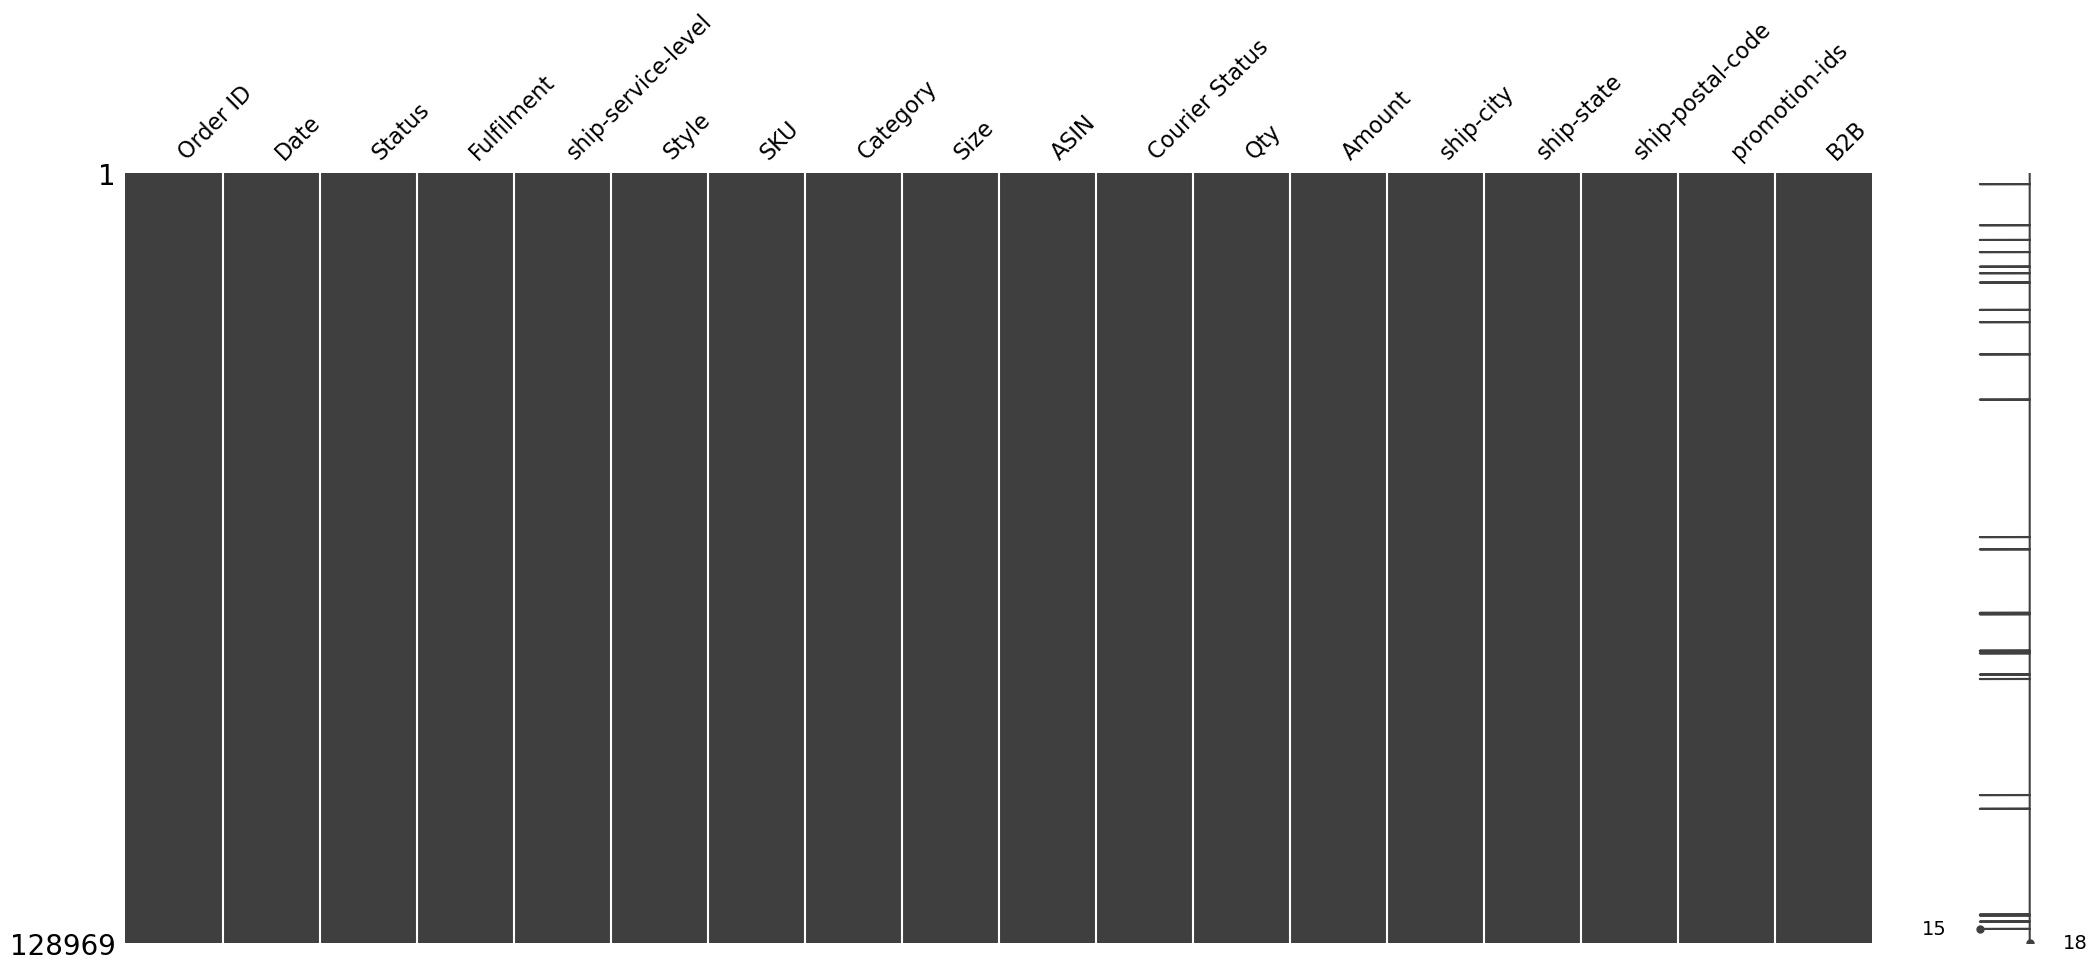

In [522]:
msno.matrix(df) 

Garis paling kanan belum berbentuk garis lurus artinya masih ada NaN values 

In [523]:
df[df['ship-city'].isnull()] # cek na values dari angle kolom ship-city

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.00,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.00,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.00,NaN,NaN,NaN,no promotion,False
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.00,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,unknown,0,0.00,NaN,NaN,NaN,no promotion,False
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.00,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.00,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,"1,112.00",NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.00,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False


In [524]:
# isi data alamat yang NaN dengan string 'unknown'
df['ship-city'].fillna('unknown', inplace = True)
df['ship-state'].fillna('unknown', inplace = True)
df['ship-postal-code'].fillna('unknown', inplace = True)

<AxesSubplot:>

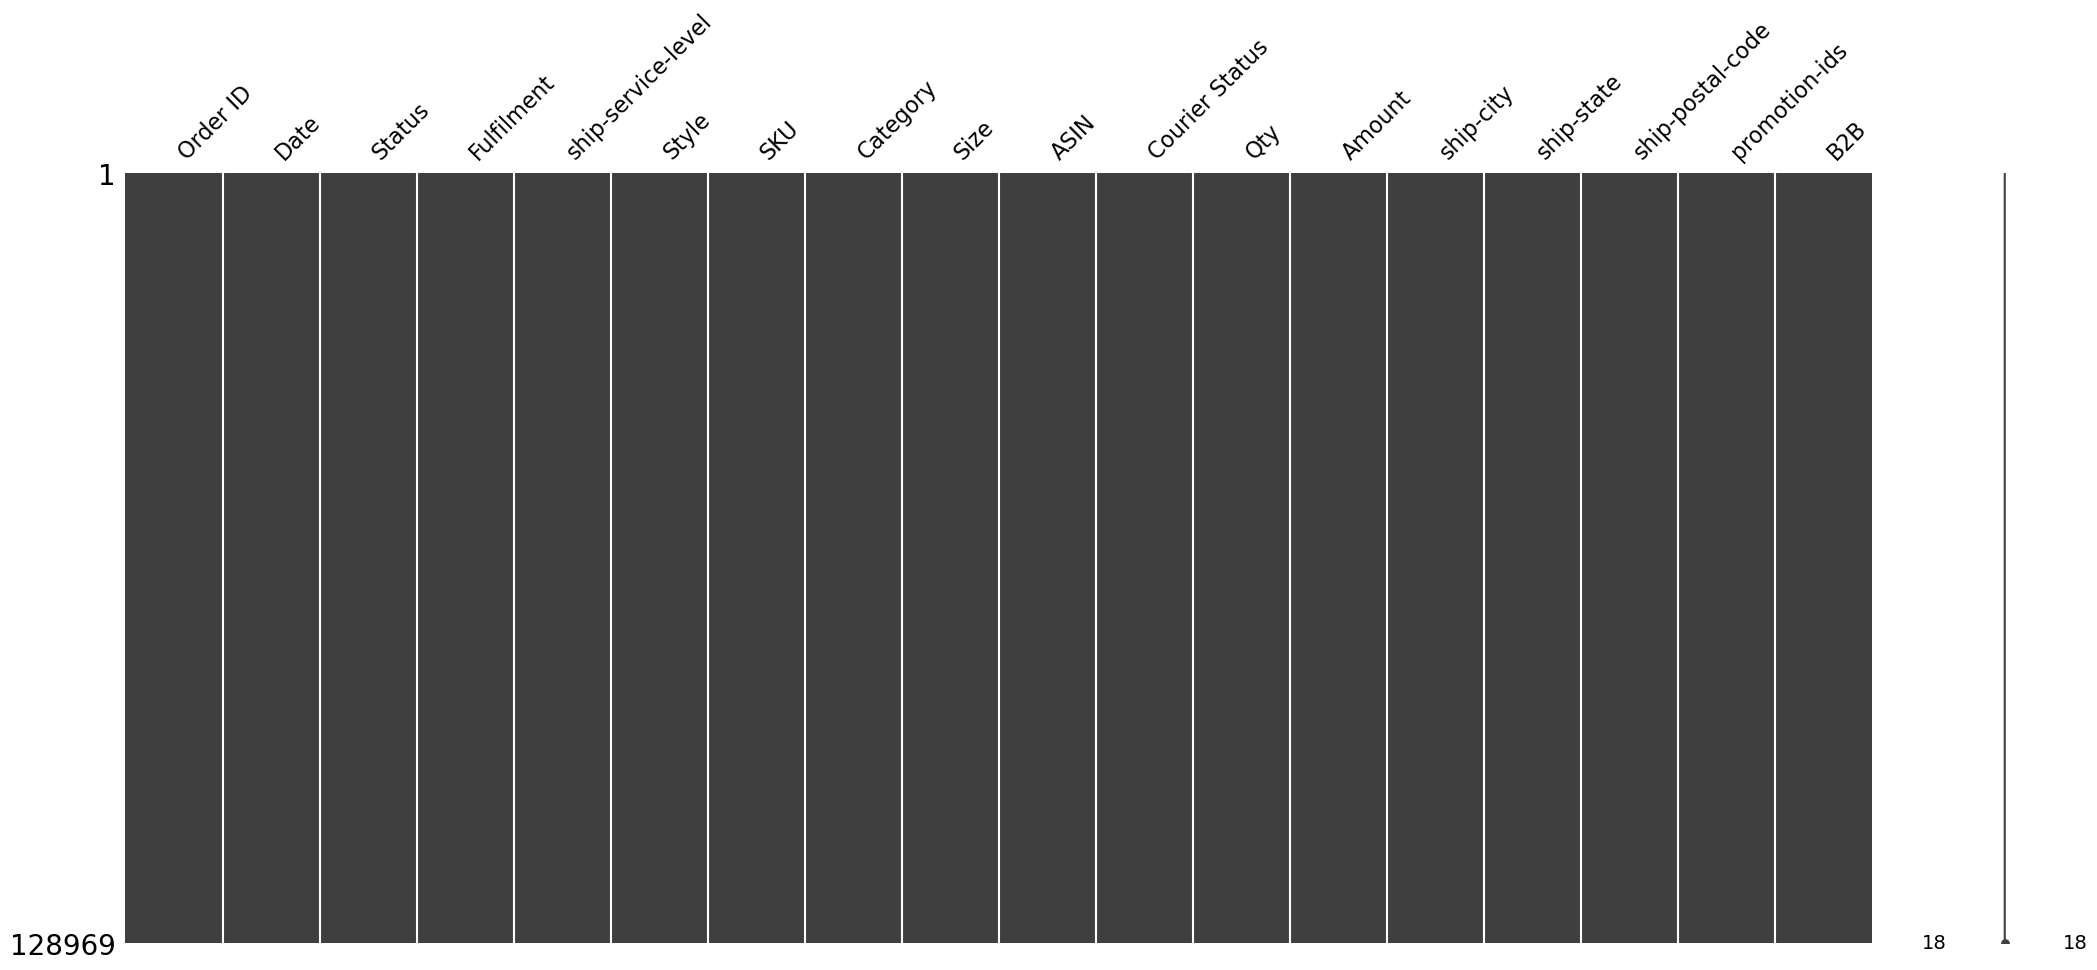

In [525]:
msno.matrix(df)

Garis di kanan sudah tegak lurus menunjukkan data tidak ada lagi NaN values

In [526]:
# rename kolom untuk simplifikasi indexing dan EDA
mapper = {'Order ID':'orderID', 'Date':'date', 'Status':'shipStatus','Fullfilment':'fullfilment', 'ship-service-level':'serviceLevel', 'Style':'style', 'SKU':'sku', 'Category':'productCategory', 'Size':'size', 'ASIN':'asin', 'Courier Status':'courierShipStatus', 'Qty':'orderQuantity', 'Amount':'orderAmount (INR)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 'promotion-ids':'promotion','B2B':'customerType' }
df.rename(columns = mapper, inplace = True)

In [527]:
# mengganti kolom tipe customer dengan string untuk mempermudah readability
df['customerType'].replace([True, False], ['business', 'consumer'], inplace = True)
df.head()

,orderID,date,shipStatus,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
index,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,0.00,MUMBAI,MAHARASHTRA,"400,081.00",no promotion,consumer
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,"560,085.00",Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,"410,210.00",IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,0.00,PUDUCHERRY,PUDUCHERRY,"605,008.00",no promotion,consumer
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,"600,073.00",no promotion,consumer


In [528]:
df['date'] = pd.to_datetime(df['date']) #mengganti tipe data object menjadi pandas datetime

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128969 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   orderID            128969 non-null  object        
 1   date               128969 non-null  datetime64[ns]
 2   shipStatus         128969 non-null  object        
 3   Fulfilment         128969 non-null  object        
 4   serviceLevel       128969 non-null  object        
 5   style              128969 non-null  object        
 6   sku                128969 non-null  object        
 7   productCategory    128969 non-null  object        
 8   size               128969 non-null  object        
 9   asin               128969 non-null  object        
 10  courierShipStatus  128969 non-null  object        
 11  orderQuantity      128969 non-null  int64         
 12  orderAmount (INR)  128969 non-null  float64       
 13  city               128969 non-null  object  

## Analysis

## Problem Statement
1. Sales over time
2. Product category profitability per month
3. Most & least profitable product category per month
4. Most & least salable product per month
5. Customers location
6. Number of customers over time
7. Number of transactions


1. Sales over time

In [532]:
# monthly sales over time
df_query = df[df.shipStatus!='Cancelled']
sales_monthly = df_query.groupby(pd.Grouper(key='date',freq='1M')).sum().reset_index()
sales_monthly

,date,orderQuantity,orderAmount (INR)
0,2022-03-31,152,"94,810.00"
1,2022-04-30,42096,"26,234,520.00"
2,2022-05-31,36267,"23,952,062.00"
3,2022-06-30,32474,"21,389,367.00"


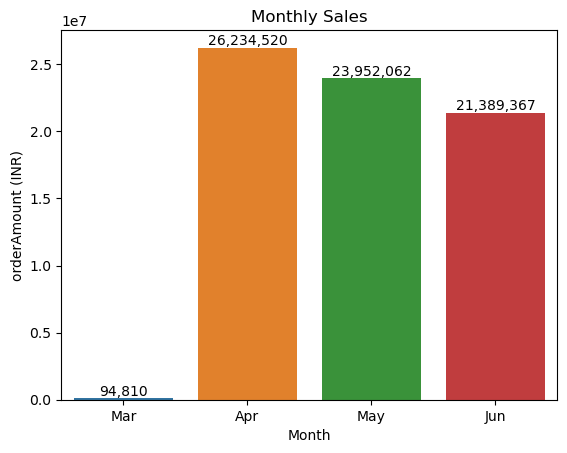

In [533]:
xticklabels = ['Mar','Apr','May','Jun']
ax = sns.barplot(x=sales_monthly['date'],y=sales_monthly['orderAmount (INR)'])
ax.set_xlabel('Month')
ax.set_xticklabels(labels=xticklabels)
ax.set_title('Monthly Sales')
for e in ax.containers:
    ax.bar_label(e, labels=[f'{x:,.0f}' for x in e.datavalues])


2. Product category profitability per month (ranked highest to lowest)

In [534]:
mppc = df.groupby([pd.Grouper(key='date',freq='1M'),'productCategory'],sort=True).sum()
mppc_sorted = mppc.sort_values(by=['date','orderAmount (INR)'],ascending=[True,False])
mppc_sorted

orderQuantity  orderAmount (INR)
date       productCategory                                  
2022-03-31 Set                         68          53,884.00
           kurta                       71          33,008.00
           Western Dress                6           5,479.00
           Top                          9           4,511.00
           Ethnic Dress                 1           1,099.00
           Blouse                       1             280.00
2022-04-30 Set                      18143      14,873,896.00
           kurta                    17676       7,609,076.00
           Western Dress             3778       2,791,950.00
           Top                       3661       1,772,585.00
           Ethnic Dress               313         237,600.00
           Blouse                     400         184,127.00
           Bottom                     167          61,157.00
           Saree                       68          51,460.00
2022-05-31 Set                      14405      12,116,490.00
           kurta                    13549       6,417,791.00
           Western Dress             5408       4,133,378.00
           Top                       3764       1,936,637.00
           Ethnic Dress               411         278,999.00
           Blouse                     293         150,128.00
           Bottom                     126          43,577.00
           Saree                       53          41,009.00
2022-06-30 Set                      12671      10,616,052.00
           kurta                    13748       6,391,733.00
           Western Dress             4751       3,698,289.00
           Top                       2469       1,490,000.00
           Ethnic Dress               328         243,013.00
           Blouse                     169         100,216.00
           Bottom                     105          35,492.00
           Saree                       31          26,040.00
           Dupatta                      3             915.00

3. Most & least profitable product category per month

In [535]:
# most profitable
mppc_sorted.reset_index().drop_duplicates('date',keep='first')

,date,productCategory,orderQuantity,orderAmount (INR)
0,2022-03-31,Set,68,"53,884.00"
6,2022-04-30,Set,18143,"14,873,896.00"
14,2022-05-31,Set,14405,"12,116,490.00"
22,2022-06-30,Set,12671,"10,616,052.00"


In [536]:
# least profitable
mppc_sorted.reset_index().drop_duplicates('date',keep='last')

,date,productCategory,orderQuantity,orderAmount (INR)
5,2022-03-31,Blouse,1,280.00
13,2022-04-30,Saree,68,"51,460.00"
21,2022-05-31,Saree,53,"41,009.00"
30,2022-06-30,Dupatta,3,915.00


4. Most & least profitable product category for both consumer and business

In [537]:
df_consumer = df[df['customerType']=='consumer'] # filtering dataframe based on customer types
df_business =  df[df['customerType']=='business']

In [538]:
# most profitable prod. category for consumer
mppc_cons = df_consumer.groupby([pd.Grouper(key='date',freq='1M'),'productCategory'],sort=True).sum()
mppc_cons_sorted = mppc_cons.sort_values(by=['date','orderAmount (INR)'],ascending=[True,False])
mppc_cons_sorted.reset_index().drop_duplicates('date',keep='first')

,date,productCategory,orderQuantity,orderAmount (INR)
0,2022-03-31,Set,68,"53,884.00"
6,2022-04-30,Set,17996,"14,743,120.00"
14,2022-05-31,Set,14309,"12,028,690.00"
22,2022-06-30,Set,12583,"10,541,191.00"


In [539]:
# least profitable prod. category for consumer
mppc_cons = df_consumer.groupby([pd.Grouper(key='date',freq='1M'),'productCategory'],sort=True).sum()
mppc_cons_sorted = mppc_cons.sort_values(by=['date','orderAmount (INR)'],ascending=[True,False])
mppc_cons_sorted.reset_index().drop_duplicates('date',keep='last')

,date,productCategory,orderQuantity,orderAmount (INR)
5,2022-03-31,Blouse,1,280.00
13,2022-04-30,Saree,67,"50,641.00"
21,2022-05-31,Saree,52,"40,177.00"
30,2022-06-30,Dupatta,3,915.00


In [540]:
# most profitable prod. category for business
mppc_biz = df_business.groupby([pd.Grouper(key='date',freq='1M'),'productCategory'],sort=True).sum()
mppc_biz_sorted = mppc_biz.sort_values(by=['date','orderAmount (INR)'],ascending=[True,False])
mppc_biz_sorted.reset_index().drop_duplicates('date',keep='first')

,date,productCategory,orderQuantity,orderAmount (INR)
0,2022-04-30,Set,147,"130,776.00"
8,2022-05-31,Set,96,"87,800.00"
16,2022-06-30,Set,88,"74,861.00"


In [541]:
# least profitable prod. category for business
mppc_biz = df_business.groupby([pd.Grouper(key='date',freq='1M'),'productCategory'],sort=True).sum()
mppc_biz_sorted = mppc_biz.sort_values(by=['date','orderAmount (INR)'],ascending=[True,False])
mppc_biz_sorted.reset_index().drop_duplicates('date',keep='last')

,date,productCategory,orderQuantity,orderAmount (INR)
7,2022-04-30,Saree,1,819.00
15,2022-05-31,Bottom,0,0.00
21,2022-06-30,Blouse,1,388.00


5. Most & least salable product category per month

In [546]:
# most salable product category
mspc = df.groupby([pd.Grouper(key='date',freq='1M'),'productCategory'],sort=True).sum()
mspc_sorted = mppc.sort_values(by=['date','orderQuantity'],ascending=[True,False])
mspc_sorted.reset_index().drop_duplicates('date',keep='first')

,date,productCategory,orderQuantity,orderAmount (INR)
0,2022-03-31,kurta,71,"33,008.00"
6,2022-04-30,Set,18143,"14,873,896.00"
14,2022-05-31,Set,14405,"12,116,490.00"
22,2022-06-30,kurta,13748,"6,391,733.00"


In [547]:
# least salable product category
mspc = df.groupby([pd.Grouper(key='date',freq='1M'),'productCategory'],sort=True).sum()
mspc_sorted = mppc.sort_values(by=['date','orderQuantity'],ascending=[True,False])
mspc_sorted.reset_index().drop_duplicates('date',keep='last')

,date,productCategory,orderQuantity,orderAmount (INR)
5,2022-03-31,Ethnic Dress,1,"1,099.00"
13,2022-04-30,Saree,68,"51,460.00"
21,2022-05-31,Saree,53,"41,009.00"
30,2022-06-30,Dupatta,3,915.00


5. Customers location

In [568]:
df.groupby(['state','city']).count()['orderID'].to_frame().rename(columns={'orderID':'num_transactions'})

num_transactions
state              city                                                    
ANDAMAN & NICOBAR  Andaman and nicobar islands port Blair                 1
                   BAMBOOFLAT                                            10
                   FERRARGUNJ                                            10
                   GARACHARMA                                             1
                   GREAT NICOBAR                                          3
...                                                                     ...
rajasthan          jaipur                                                 3
                   madanganj-kishangarh  ajmer                            2
                   sriganganagar                                          1
rajsthan           Bheem                                                  1
unknown            unknown                                               33

[9149 rows x 1 columns]

6. Number of transactions per month

In [567]:
# most salable product category
df.groupby([pd.Grouper(key='date',freq='1M')],sort=True).count()['orderID'].to_frame()


,orderID
date,
2022-03-31,171
2022-04-30,49065
2022-05-31,42037
2022-06-30,37696


## Conclusion